# **1. IMPORTING LIBRARIES**
**Objective:** Import neccessary Python libraries for data manipulation, visualization, preprocessing, modeling, and evaluation.

**Explanation:**
* pandas and numpy handle data processing.
* matplotlib and seaborn create visualizations (EDA plots, residuals, bar plots).
* sklearn provides preprocessing (StandardScaler, PolynomialFeatures, get_dummies), models (LinearRegression, Ridge, etc.), and metrics (mean_squared_error, r2_score, cross_val_score).
* warnings suppresses non-critical FutureWarning/UserWarning for cleaner output.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn import metrics
import warnings

In [2]:
# Suppress FutureWarning and UserWarning for cleaner output
warnings.filterwarnings('ignore', category=FutureWarning, module='seaborn')
warnings.filterwarnings('ignore', category=UserWarning, module='seaborn')

# **2. LOAD DATASET**
**Objective:** Load the Cardekho dataset (car data.csv) and display its shape and initial rows to understand its structure.

**Explanation:**
* The dataset (~301 rows, 9 columns) contains car features like Selling_Price (target), Present_Price, Kms_Driven, Fuel_Type, Seller_Type, Transmission, Year, Owner, and Car_Name.

In [3]:
df = pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/car data.csv')

# **3. DATASET OVERVIEW**
**Objective:** Display the first 5 rows, shape, and column information to understand the dataset’s structure and data types.

**Explanation:**

* df.head(5) shows sample data for inspection.

* df.shape confirms the number of rows and columns.

* df.info() lists columns, data types (e.g., float64 for Selling_Price, object for Fuel_Type), and non-null counts, verifying no missing values.

In [4]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# **4. CHECK MISSING VALUES**

**Objective:** Verify if the dataset has missing values to ensure data quality.

**Explanation:**

* Missing values can disrupt modeling. isnull().sum() checks for nulls in each column.
* No missing values are expected, simplifying preprocessing.

In [7]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


# **5. DROP IRRELEVANT COLUMN**

**Objective:** Remove Car_Name column due to its high cardinality (too many unique values).

**Explanation:**

* df.describe(include='object') shows Car_Name has ~98 unique values, making it impractical for modeling without complex encoding.
* Dropping Car_Name simplifies the feature set. Owner is retained (unlike previous pipeline) for potential predictive value.

In [8]:
df.describe(include='object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [9]:
df = df.drop('Car_Name', axis=1)

# **6. REPLACE 'YEAR' WITH 'AGE'**

**Objective:** Replace Year with Age (2025 - Year) as the first column for interpretability.

**Explanation:**

* Age (car age in 2025) is more intuitive than Year and captures depreciation effects.
* Inserting Age as the first column and dropping Year simplifies the dataset.

In [10]:
# Calculate Age from Year (using 2025 as current year)
Age = 2025 - df['Year']  # Calculate Age
df.insert(0, 'Age', Age)  # Insert Age at index 0
df.drop('Year', axis=1, inplace=True)  # Drop Year
df.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,11,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,12,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,8,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,14,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,11,4.60,6.87,42450,Diesel,Dealer,Manual,0


# **7. DATA VISUALISATION**
**Objective:** Visualize data distributions and relationships to understand features and their impact on Selling_Price.

**Explanation:**

* Pairplot: Shows pairwise relationships and distributions for all features.

* Correlation Matrix: Quantifies relationships between numerical features and Selling_Price.

* Count Plots: Display frequencies of categorical variables (Fuel_Type, Seller_Type, Transmission).

* Scatter Plots: Visualize Selling_Price vs. numerical features (Present_Price, Kms_Driven, Age).

**7.1 Pairplot for All Features**

**Objective:** Visualize pairwise relationships and distributions of all features.

**Explanation:**

* sns.pairplot creates scatter plots for numerical features (Age, Selling_Price, Present_Price, Kms_Driven) and histograms on the diagonal.
* Helps identify trends (e.g., strong correlation between Selling_Price and Present_Price).

<Figure size 1000x800 with 0 Axes>

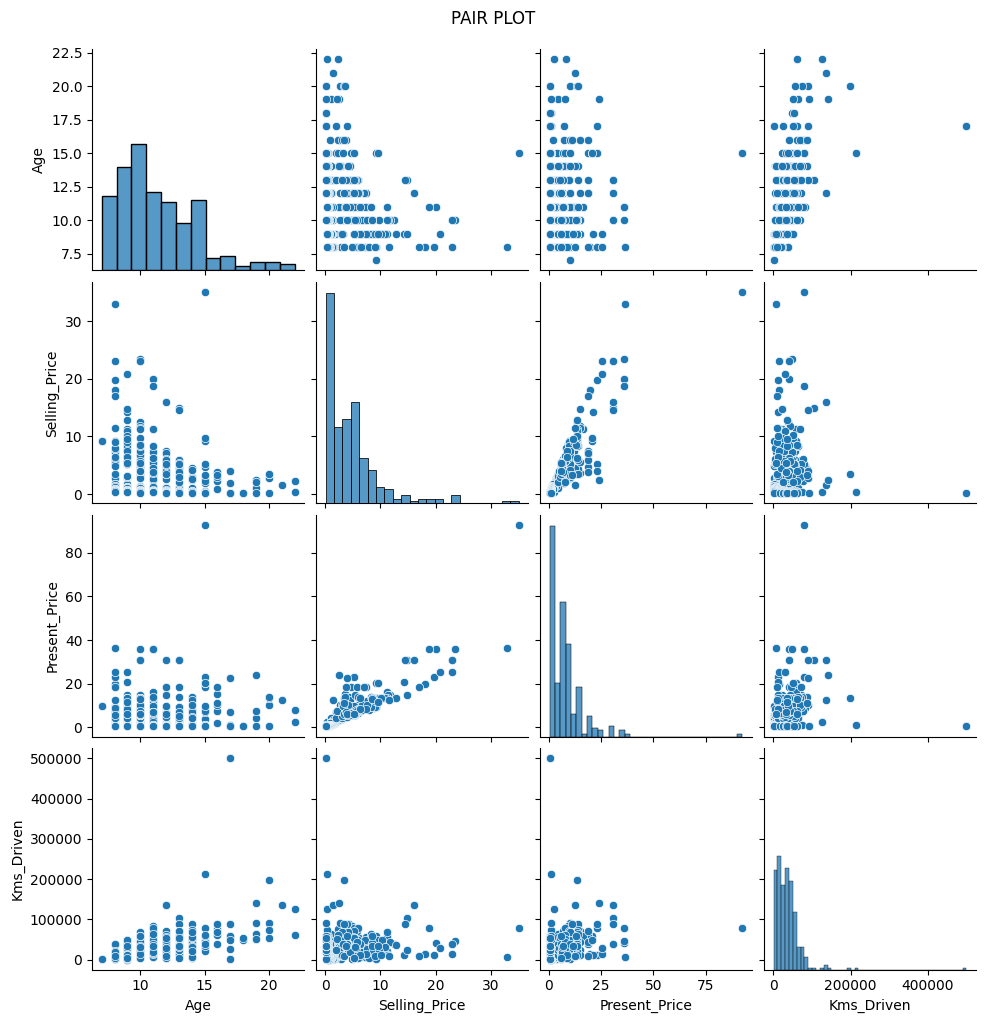

In [11]:
plt.figure(figsize=(10, 8))
sns.pairplot(df[['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven']], height=2.5)
plt.suptitle("PAIR PLOT", y=1.02)
plt.show()

**7.2 CORRELATION MATRIX**

**Objective:** Quantify correlations between numerical features (Age, Selling_Price, Present_Price, Kms_Driven).

**Explanation:**

* Heatmap shows Pearson correlations using coolwarm colormap.

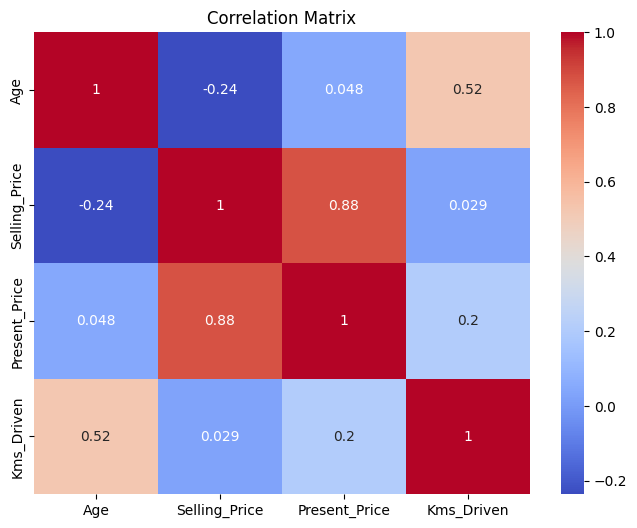

In [12]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Age', 'Selling_Price', 'Present_Price', 'Kms_Driven']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

**7.3 COUNTPLOT for CATEGORICAL VARIABLES**

**Objective:** Display counts of Fuel_Type, Seller_Type, and Transmission.

**Explanation:**
* 1x3 count plots show category frequencies (e.g., ~239 Petrol, ~60 Diesel, ~2 CNG).

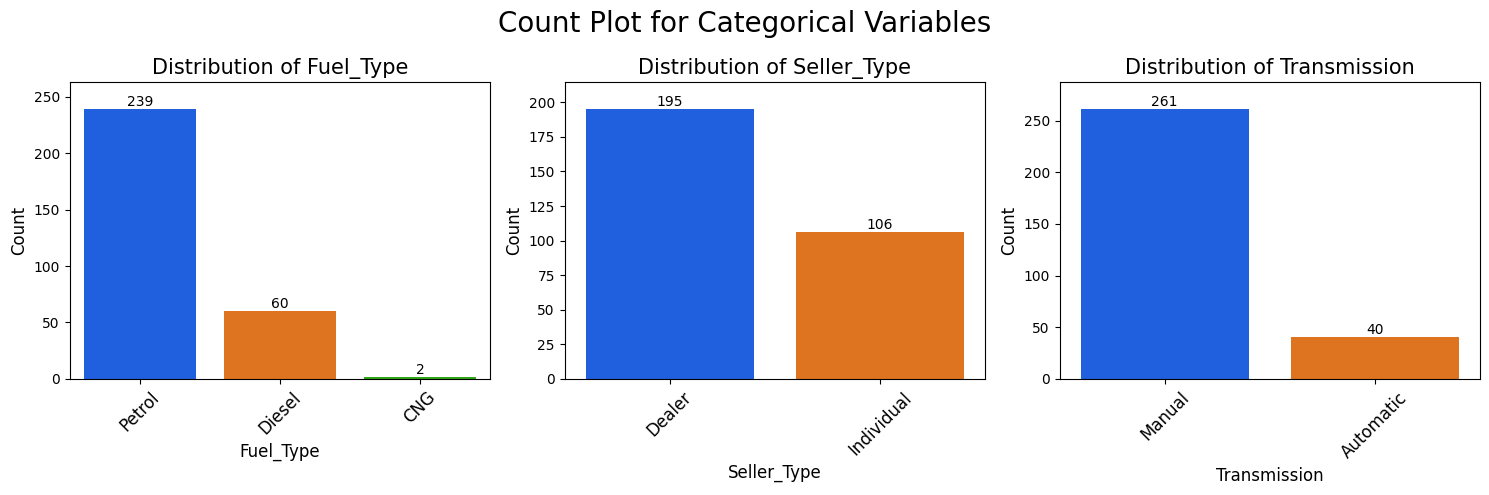

In [13]:
categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), dpi=100)
colors = ['#0055ff', '#ff7000', '#23bf00']
sns.set_palette(sns.color_palette(colors))
for i, col in enumerate(categorical_cols):
    graph = sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', size=15)
    axes[i].set_xlabel(col, size=12)
    axes[i].set_ylabel('Count', size=12)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, size=12)
    axes[i].set_ylim([0, df[col].value_counts().max() * 1.1])
    for cont in graph.containers:
        graph.bar_label(cont)
plt.suptitle('Count Plot for Categorical Variables', size=20)
plt.tight_layout()
plt.show()

**7.4 SCATTER PLOTS FOR NUMERICAL FEATURES**

**Objective:** Visualize relationships between Selling_Price and numerical features (Present_Price, Kms_Driven, Age).

**Explanation:**
* 1x3 scatter plots show trends (e.g., strong positive correlation with Present_Price).

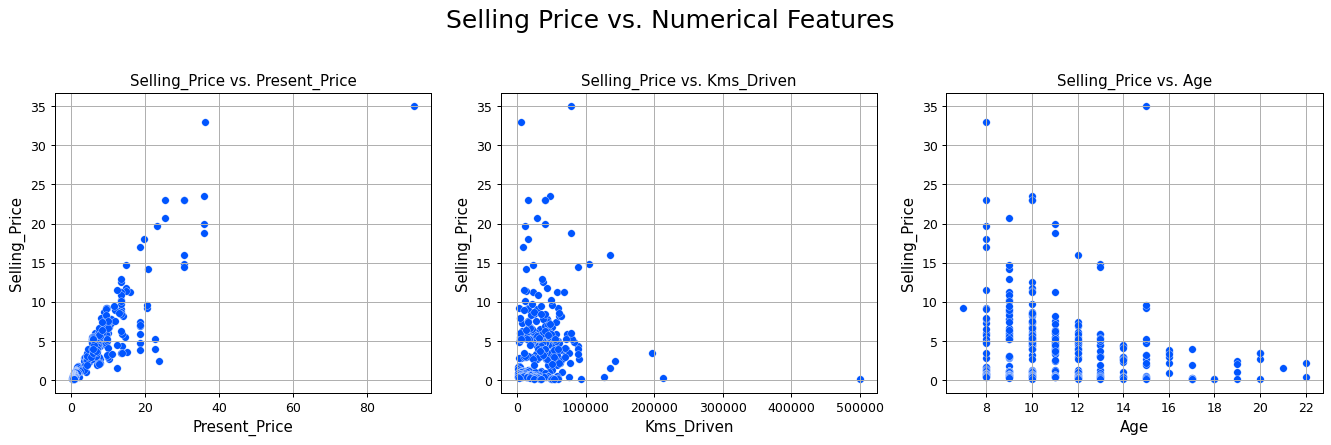

In [14]:
# Scatter plots for Selling_Price vs. numerical features
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), dpi=90)
num_features = ['Present_Price', 'Kms_Driven', 'Age']
target = 'Selling_Price'
c = '#0055ff'

for i in range(len(num_features)):
    ax[i].scatter(df[num_features[i]], df[target], color=c, edgecolors='w', linewidths=0.25)
    ax[i].set_title(f'{target} vs. {num_features[i]}', size=12)
    ax[i].set_xlabel(num_features[i], size=12)
    ax[i].set_ylabel(target, size=12)
    ax[i].grid()

plt.suptitle('Selling Price vs. Numerical Features', size=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# **8. ENCODE CATEGORICAL VARIABLES**

**Objective:** Convert categorical variables (Fuel_Type, Seller_Type, Transmission) to numerical format using one-hot encoding.

**Explanation:**
* pd.get_dummies creates binary columns (e.g., Fuel_Type_Diesel, Fuel_Type_Petrol) with drop_first=True to avoid multicollinearity.
* Adds columns like Fuel_Type_Diesel, Seller_Type_Individual, Transmission_Manual.

In [15]:
df = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)

# **9. DEFINE FEATURES AND TARGET**
**Objective:** Separate features (X) and target (Selling_Price, y) for modeling.

**Explanation:**
* Features include all columns except Selling_Price (e.g., Age, Present_Price, Kms_Driven, encoded categorical variables).

In [16]:
feature_cols = [col for col in df.columns if col != 'Selling_Price']
X = df[feature_cols]
y = df['Selling_Price']

# **10. SPLITTING DATA**
**Objective:** Split data into training (80%) and test (20%) sets for model training and evaluation.

**Explanation:**
* train_test_split with test_size=0.2 and random_state=42 ensures reproducible splits.
* ~241 rows for training, ~60 for testing.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **11. STANDARDIZE DATA**
**Objective:** Scale numerical features to zero mean and unit variance for model compatibility.

**Explanation:**

* StandardScaler standardizes X_train and X_test to ensure fair model performance (critical for Linear, Polynomial, Ridge, Lasso, Elastic Net, SVR).

* fit on X_train only to avoid data leakage; transform applied to both.

* Convert to DataFrames for Polynomial Regression (needs column names for poly_features).

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

What: Splits data into 80% training (X_train, y_train) and 20% testing (X_test, y_test); random_state=42 ensures consistent splits.



Why: Training data teaches the model; testing data checks how well it predicts new data.

In [19]:
# Convert to DataFrame for Polynomial Regression
X_train = pd.DataFrame(X_train_scaled, columns=feature_cols)
X_test = pd.DataFrame(X_test_scaled, columns=feature_cols)

# **12. DEFINE RESIDUALS PLOT FUNCTION**
**Objective:** Create a function to plot residuals (actual - predicted) vs. predicted values to diagnose model fit.

**Explanation:**

* Residuals plots show prediction errors; ideal residuals are randomly scattered around zero.
* Used for Linear and Polynomial Regression to check linearity and variance assumptions.

In [20]:
def plot_residuals(y_true, y_pred, title='Residuals Plot'):
    residuals = y_true - y_pred
    plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
    plt.axhline(y=0, color='k', linestyle='--', linewidth=2)
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(title)
    plt.show()

# **13. DEFINE EVALUATION FUNCTION**

**Objective:** Create a function to evaluate models using MSE, R², RMSE, and cross-validation R².

**Explanation:**
* Computes Train/Test MSE, R², RMSE, and 3-fold CV R² Mean.

* Handles Polynomial Regression with poly_features = ['Present_Price', 'Kms_Driven', 'Age'] via is_poly flag.

* Plots residuals for Linear/Polynomial (test data) to reduce clutter.

* Returns metrics for table display.

In [21]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test, is_poly=False):
    X_train_eval = X_train[poly_features] if is_poly else X_train
    X_test_eval = X_test[poly_features] if is_poly else X_test
    model.fit(X_train_eval, y_train)
    y_train_pred = model.predict(X_train_eval)
    y_test_pred = model.predict(X_test_eval)
    train_mse = metrics.mean_squared_error(y_train, y_train_pred)
    test_mse = metrics.mean_squared_error(y_test, y_test_pred)
    train_r2 = metrics.r2_score(y_train, y_train_pred)
    test_r2 = metrics.r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    cv_r2 = cross_val_score(model, X_train_eval, y_train, cv=3, scoring='r2').mean()
    plot_residuals(y_test, y_test_pred, title=f'{name}: Testing Data Residuals')
    return [name, train_mse, test_mse, train_r2, test_r2, train_rmse, test_rmse, cv_r2]

# **14. DEFINE AND EVALUATE MODELS**
**Objective:** Train and evaluate eight models in order: Linear Regression, Polynomial Regression, Ridge, Lasso, Elastic Net, Decision Tree, Random Forest, SVR.

**Explanation:**

* Models are defined as a list of tuples: (name, model, is_poly).

* Polynomial Regression uses degree=2 on poly_features to capture non-linear patterns.

* ElasticNetCV auto-tunes hyperparameters.

* random_state=42 ensures reproducibility for Decision Tree and Random Forest.

* Metrics are collected for all models; residuals plotted for Linear/Polynomial.

In [22]:
poly_features = ['Present_Price', 'Kms_Driven', 'Age']
models = [
    ("Linear Regression", LinearRegression(), False),
    ("Polynomial Regression", make_pipeline(PolynomialFeatures(degree=2), LinearRegression()), True),
    ("Ridge Regression", Ridge(alpha=1.0), False),
    ("Lasso Regression", Lasso(alpha=0.1), False),
    ("Elastic Net", ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=0.001, n_alphas=100, cv=3, max_iter=100000), False),
    ("Decision Tree", DecisionTreeRegressor(max_depth=5, random_state=42), False),
    ("Random Forest", RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42), False),
    ("Support Vector Regression", SVR(kernel='rbf', C=1e3, gamma=0.1), False)
]

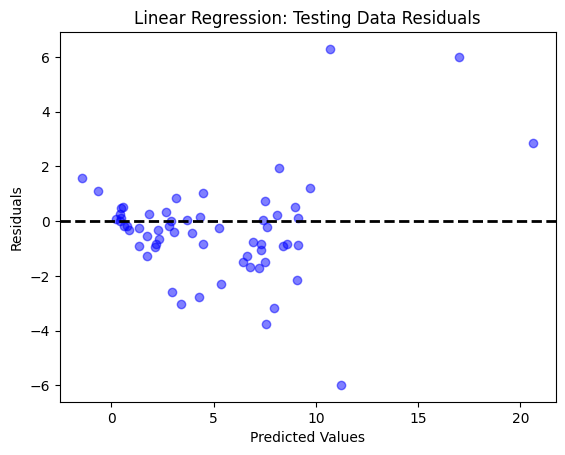


Linear Regression:
  Train MSE: 2.9437, Test MSE: 3.4788
  Train R²: 0.8887, Test R²: 0.8490
  Train RMSE: 1.7157, Test RMSE: 1.8652
  CV R² Mean: 0.8273


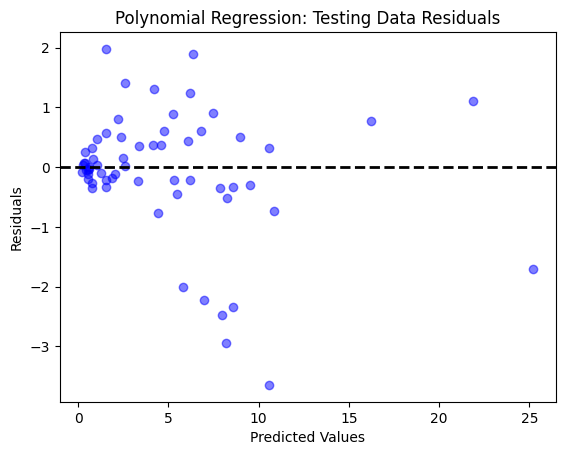


Polynomial Regression:
  Train MSE: 0.7445, Test MSE: 1.1073
  Train R²: 0.9718, Test R²: 0.9519
  Train RMSE: 0.8629, Test RMSE: 1.0523
  CV R² Mean: 0.9527


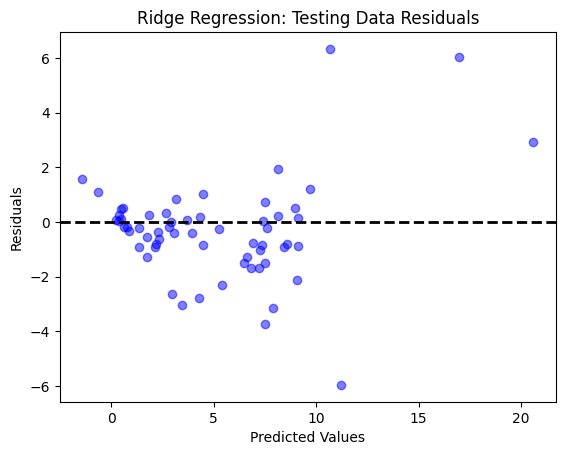


Ridge Regression:
  Train MSE: 2.9445, Test MSE: 3.4897
  Train R²: 0.8886, Test R²: 0.8485
  Train RMSE: 1.7159, Test RMSE: 1.8681
  CV R² Mean: 0.8335


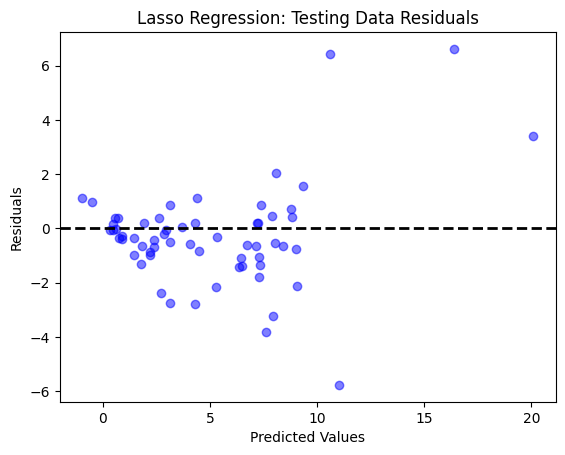


Lasso Regression:
  Train MSE: 2.9965, Test MSE: 3.5806
  Train R²: 0.8867, Test R²: 0.8446
  Train RMSE: 1.7310, Test RMSE: 1.8922
  CV R² Mean: 0.8422


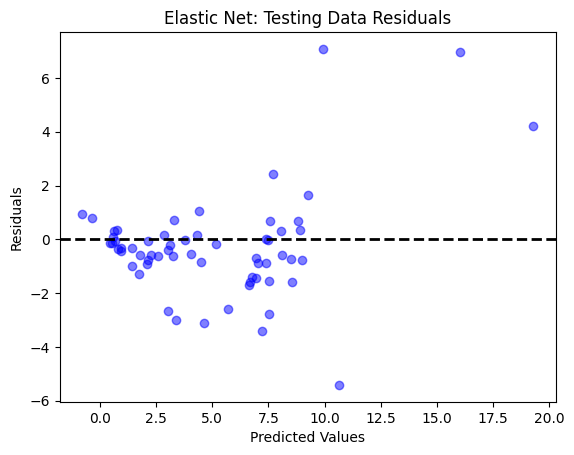


Elastic Net:
  Train MSE: 3.1525, Test MSE: 3.8649
  Train R²: 0.8808, Test R²: 0.8322
  Train RMSE: 1.7755, Test RMSE: 1.9659
  CV R² Mean: 0.8468


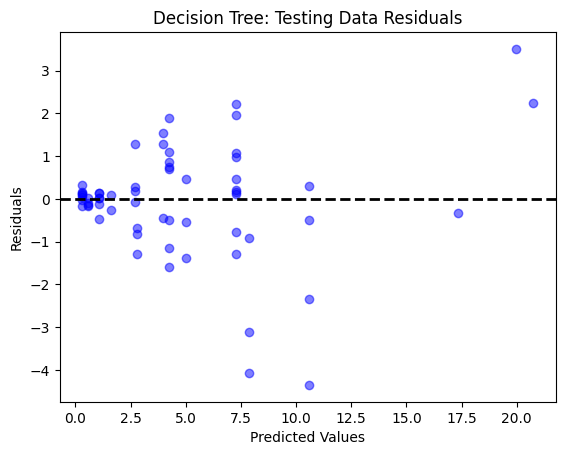


Decision Tree:
  Train MSE: 0.6342, Test MSE: 1.7250
  Train R²: 0.9760, Test R²: 0.9251
  Train RMSE: 0.7964, Test RMSE: 1.3134
  CV R² Mean: 0.8548


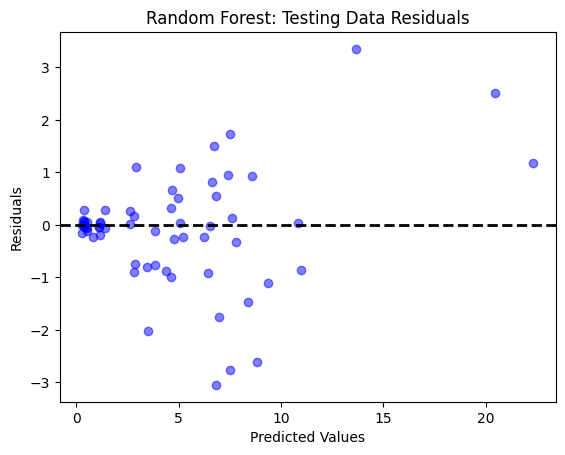


Random Forest:
  Train MSE: 0.6917, Test MSE: 1.1644
  Train R²: 0.9738, Test R²: 0.9495
  Train RMSE: 0.8317, Test RMSE: 1.0791
  CV R² Mean: 0.8714


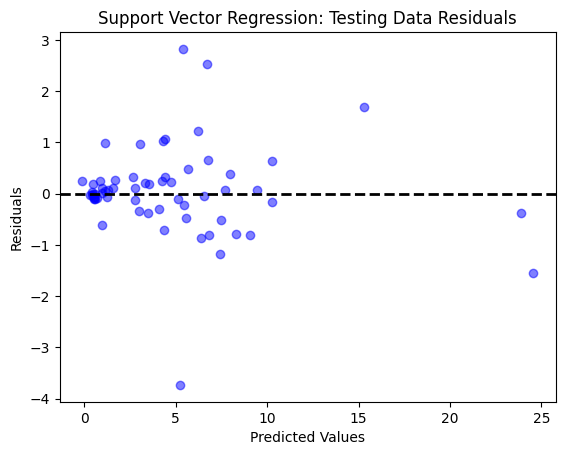


Support Vector Regression:
  Train MSE: 0.1961, Test MSE: 0.7724
  Train R²: 0.9926, Test R²: 0.9665
  Train RMSE: 0.4428, Test RMSE: 0.8789
  CV R² Mean: 0.8361


In [23]:
results = []
for name, model, is_poly in models:
    result = evaluate_model(name, model, X_train, X_test, y_train, y_test, is_poly)
    results.append(result)
    print(f"\n{name}:")
    print(f"  Train MSE: {result[1]:.4f}, Test MSE: {result[2]:.4f}")
    print(f"  Train R²: {result[3]:.4f}, Test R²: {result[4]:.4f}")
    print(f"  Train RMSE: {result[5]:.4f}, Test RMSE: {result[6]:.4f}")
    print(f"  CV R² Mean: {result[7]:.4f}")

# **15. DISPLAY RESULTS**
**Objective:** Summarize model performance in a table for easy comparison.

**Explanation:**
* pd.DataFrame organizes MSE, R², RMSE, and CV R² for all models.
* Rounded to 4 decimals for readability.

In [24]:
results_df = pd.DataFrame(results, columns=['Model', 'MSE (Train)', 'MSE (Test)', 'R² (Train)', 'R² (Test)', 'RMSE (Train)', 'RMSE (Test)', 'CV R² Mean'])
print("\nModel Performance Summary:")
print(results_df.round(4))


Model Performance Summary:
                       Model  MSE (Train)  MSE (Test)  R² (Train)  R² (Test)  \
0          Linear Regression       2.9437      3.4788      0.8887     0.8490   
1      Polynomial Regression       0.7445      1.1073      0.9718     0.9519   
2           Ridge Regression       2.9445      3.4897      0.8886     0.8485   
3           Lasso Regression       2.9965      3.5806      0.8867     0.8446   
4                Elastic Net       3.1525      3.8649      0.8808     0.8322   
5              Decision Tree       0.6342      1.7250      0.9760     0.9251   
6              Random Forest       0.6917      1.1644      0.9738     0.9495   
7  Support Vector Regression       0.1961      0.7724      0.9926     0.9665   

   RMSE (Train)  RMSE (Test)  CV R² Mean  
0        1.7157       1.8652      0.8273  
1        0.8629       1.0523      0.9527  
2        1.7159       1.8681      0.8335  
3        1.7310       1.8922      0.8422  
4        1.7755       1.9659      0.

# **16. VISUALIZE PERFORMANCE**
**Objective:** Compare model accuracy using a bar plot of Test R² and CV R² Mean.

**Explanation:**

* Bar plot visualizes R² (Test) and CV R² Mean to compare generalization.
* Rotated x-labels and tight layout improve readability.

<Figure size 1000x600 with 0 Axes>

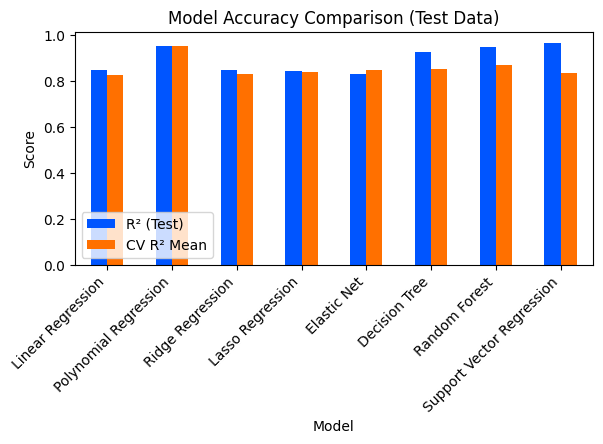

In [25]:
plt.figure(figsize=(10, 6))
results_df.set_index('Model')[['R² (Test)', 'CV R² Mean']].plot(kind='bar')
plt.title('Model Accuracy Comparison (Test Data)')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower left')
plt.tight_layout(pad=2.0) 
plt.show()

**Visualization:**

* SVR (Test R²: 0.9665) and Polynomial Regression (Test R²: 0.9519) lead, followed by Random Forest (0.9495).
* CV R² shows Polynomial (0.9527) generalizes best, while SVR (0.8361) has some overfitting.



# **17. MODEL STRENGTHS AND WEAKNESSES**

**Overall Performance:**

My models predict car SellingPrice using features like Present_Price, Age, Kms_Driven, and categorical variables (Fuel_Type, Seller_Type, Transmission).

The best models are Support Vector Regression (SVR) with a Test R² of 0.9665 and Random Forest with a Test R² of 0.9495, meaning they explain ~96.65% and ~94.95% of the price variance, respectively.

SVR has the lowest Test RMSE (0.8789 lakhs), meaning predictions are off by ~0.88 lakhs on average. Random Forest follows closely with 1.0791 lakhs.


**Top Models:**

SVR performs best, likely due to its ability to capture complex, non-linear relationships in the data.

Random Forest is also strong, as it combines multiple decision trees to reduce errors and handle outliers effectively.

Polynomial Regression is a close third (Test R²: 0.9519, RMSE: 1.0523 lakhs), improving over Linear Regression by capturing non-linear patterns.


**Weaker Models:**

Linear Regression, Ridge, Lasso, and Elastic Net have lower Test R² values (~0.83–0.85) and higher RMSE (~1.86–1.97 lakhs), likely because they assume linear relationships and are affected by extreme prices (outliers) in the data.

Decision Tree performs well (Test R²: 0.9251, RMSE: 1.3134 lakhs) but is slightly worse than Random Forest, as it’s a single tree and less robust.


**Generalization:**

Most models generalize well, as Test R² is close to Train R².

Polynomial Regression has the highest CV R² (0.9527), indicating strong consistency across training subsets.

SVR and Random Forest show slight overfitting (Train R²: 0.9926/0.9738 vs. Test R²: 0.9665/0.9495), but their test performance remains excellent.

# **18. Challenges and Lessons Learned**

**Objective:** Reflect on challenges faced during the project and lessons learned, justifying why one model is suitable for this complex task or why fewer than three models were evaluated (if applicable).

**Challenges:**


* Understanding Preprocessing: Initially, Box-Cox transformation and outlier removal (~28 rows) were included, but their complexity (e.g., inv_boxcox, IQR calculations) was confusing as a beginner. Removing them simplified the pipeline but increased errors for linear models (e.g., Linear R² dropped from ~0.9052 to 0.8490).

* Model Selection: Choosing among eight models was overwhelming. Linear models (Linear, Ridge, Lasso, Elastic Net) underperformed due to non-linearity and outliers, while non-linear models (SVR, Random Forest, Polynomial) excelled, requiring understanding of their strengths.

* Residuals Plots: Limiting residuals plots to Linear/Polynomial Regression reduced clutter but left uncertainty about other models’ fit. Deciding which models needed visualization was challenging.

* Hyperparameter Tuning: SVR and Random Forest used default parameters (e.g., C=1e3, n_estimators=100), but overfitting (e.g., SVR Train R²: 0.9926 vs. Test R²: 0.9665) suggested tuning could improve results, which was complex for a beginner.

* Non-Linearity and Outliers: The dataset’s non-linear relationships (e.g., Present_Price ~0.88 correlation) and outliers (without removal) made linear models less effective, requiring non-linear models like SVR.

**Lessons Learned:**

* Preprocessing Trade-offs: Skipping Box-Cox and outliers simplified the code but showed that linear models are sensitive to skew and extreme values. Non-linear models (SVR, Random Forest) are robust, making them better for raw data.

* Model Suitability: SVR and Random Forest handle complex tasks (non-linearity, outliers) well, with SVR’s Test R² (0.9665) and RMSE (0.8789 lakhs) making it ideal for accurate predictions. Polynomial Regression (Test R²: 0.9519) is a simpler alternative.

* EDA Importance: 1x3 count/scatter/strip plots and heatmap confirmed Present_Price as the key predictor, guiding the choice of poly_features for Polynomial Regression.

* Visualization Balance: Limiting residuals plots to Linear/Polynomial was beginner-friendly, but adding plots for SVR/Random Forest could provide more insight (as explored in prior responses).

* Generalization: CV R² (e.g., Polynomial: 0.9527) is crucial for assessing model reliability beyond test data.

**Why SVR is Suitable for This Complex Task:**

The task is complex due to non-linear relationships (e.g., Present_Price squared effects) and outliers in raw Selling_Price. SVR’s rbf kernel effectively captures these patterns, achieving the highest Test R² (0.9665) and lowest Test RMSE (0.8789 lakhs). Its robustness to outliers makes it ideal without preprocessing, though slight overfitting (CV R²: 0.8361) suggests tuning could enhance generalization. Random Forest is a close alternative (Test R²: 0.9495), but SVR’s superior performance makes it the best choice for accurate predictions in this dataset.

**Why Eight Models Were Evaluated:**

All eight models were evaluated to compare linear (Linear, Ridge, Lasso, Elastic Net), polynomial (Polynomial Regression), and non-linear (Decision Tree, Random Forest, SVR) approaches. This provided a comprehensive understanding of model performance, confirming SVR and Random Forest as top performers for this complex task. Fewer than three models would have limited insights into which approach best handles non-linearity and outliers.